# Avaliando o melhor modelo

In [153]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Parte 1, 2 e 3 - Lendo e entendendo o dataset

In [3]:
df = pl.read_csv('data/valorizacao_ambiental.csv', separator=';')
df.head()

Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
1,160000,168,1,5,1,1,294,1,0
2,67000,129,1,6,0,0,1505,1,0
3,190000,218,1,8,1,0,251,0,1
4,110000,180,12,4,1,0,245,0,0
5,70000,120,15,3,1,0,956,1,0


In [4]:
df.shape

(172, 10)

In [8]:
df.describe()

describe,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",172.0,172.0,172.0,172.0,172.0,172.0,172.0,172.0,172.0,172.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",86.5,173541.953488,163.203488,5.645349,4.296512,1.395349,0.139535,505.889535,0.581395,0.348837
"""std""",49.796252,99827.094479,65.915145,5.570057,2.239828,1.126803,0.347516,395.054522,0.494771,0.477994
"""min""",1.0,40000.0,69.0,1.0,1.0,0.0,0.0,73.0,0.0,0.0
"""25%""",44.0,105000.0,117.0,1.0,3.0,1.0,0.0,215.0,0.0,0.0
"""50%""",87.0,150000.0,145.0,3.0,4.0,1.0,0.0,408.0,1.0,0.0
"""75%""",130.0,210000.0,185.0,11.0,6.0,2.0,0.0,644.0,1.0,1.0
"""max""",172.0,579840.0,393.0,19.0,12.0,6.0,1.0,1859.0,1.0,1.0


Vamos identificar e analisar a variável target do nosso dataset.

Text(0.5, 1.0, 'Histograma da variável Valor')

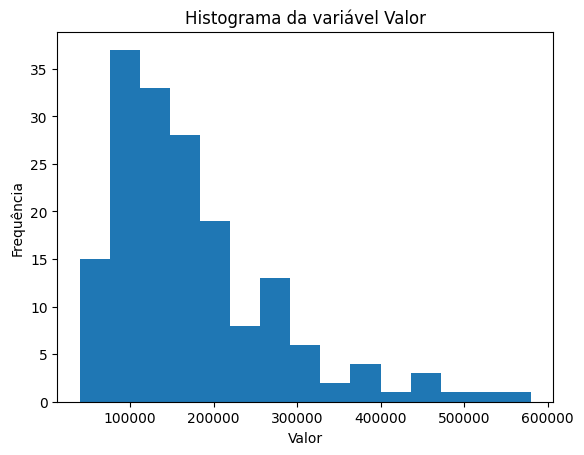

In [12]:
plt.hist(df['Valor'], bins=15)

plt.ylabel('Frequência')
plt.xlabel('Valor')
plt.title('Histograma da variável Valor')

Podemos ver que a variável valor está assimétrica, com uma calda longa no sentido dos maiores valores. Ao tirar a raiz quadrada do valor teremos o efeito de "espremer" a cauda longa, reduzindo a assimetria e, em alguns casos, deixando a distribuição mais próxima de uma normal.

Para modelos de regressão é importante que a variável target tenha uma distribuição próxima de uma normal, pois isso facilita a interpretação dos coeficientes e também a convergência do modelo.

In [16]:
df = df.with_columns(
    np.sqrt(pl.col('Valor')).alias('Valor_sqrt')
)

Text(0.5, 1.0, 'Histograma da variável Valor (Raiz Quadrada)')

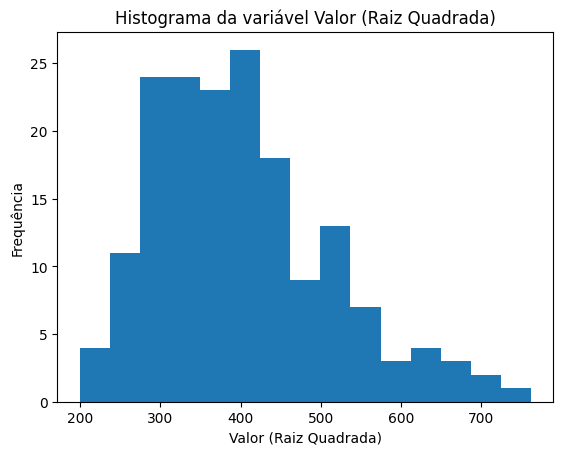

In [17]:
plt.hist(df['Valor_sqrt'], bins=15)

plt.ylabel('Frequência')
plt.xlabel('Valor (Raiz Quadrada)')
plt.title('Histograma da variável Valor (Raiz Quadrada)')

Vamos analisar as outras variáveis.

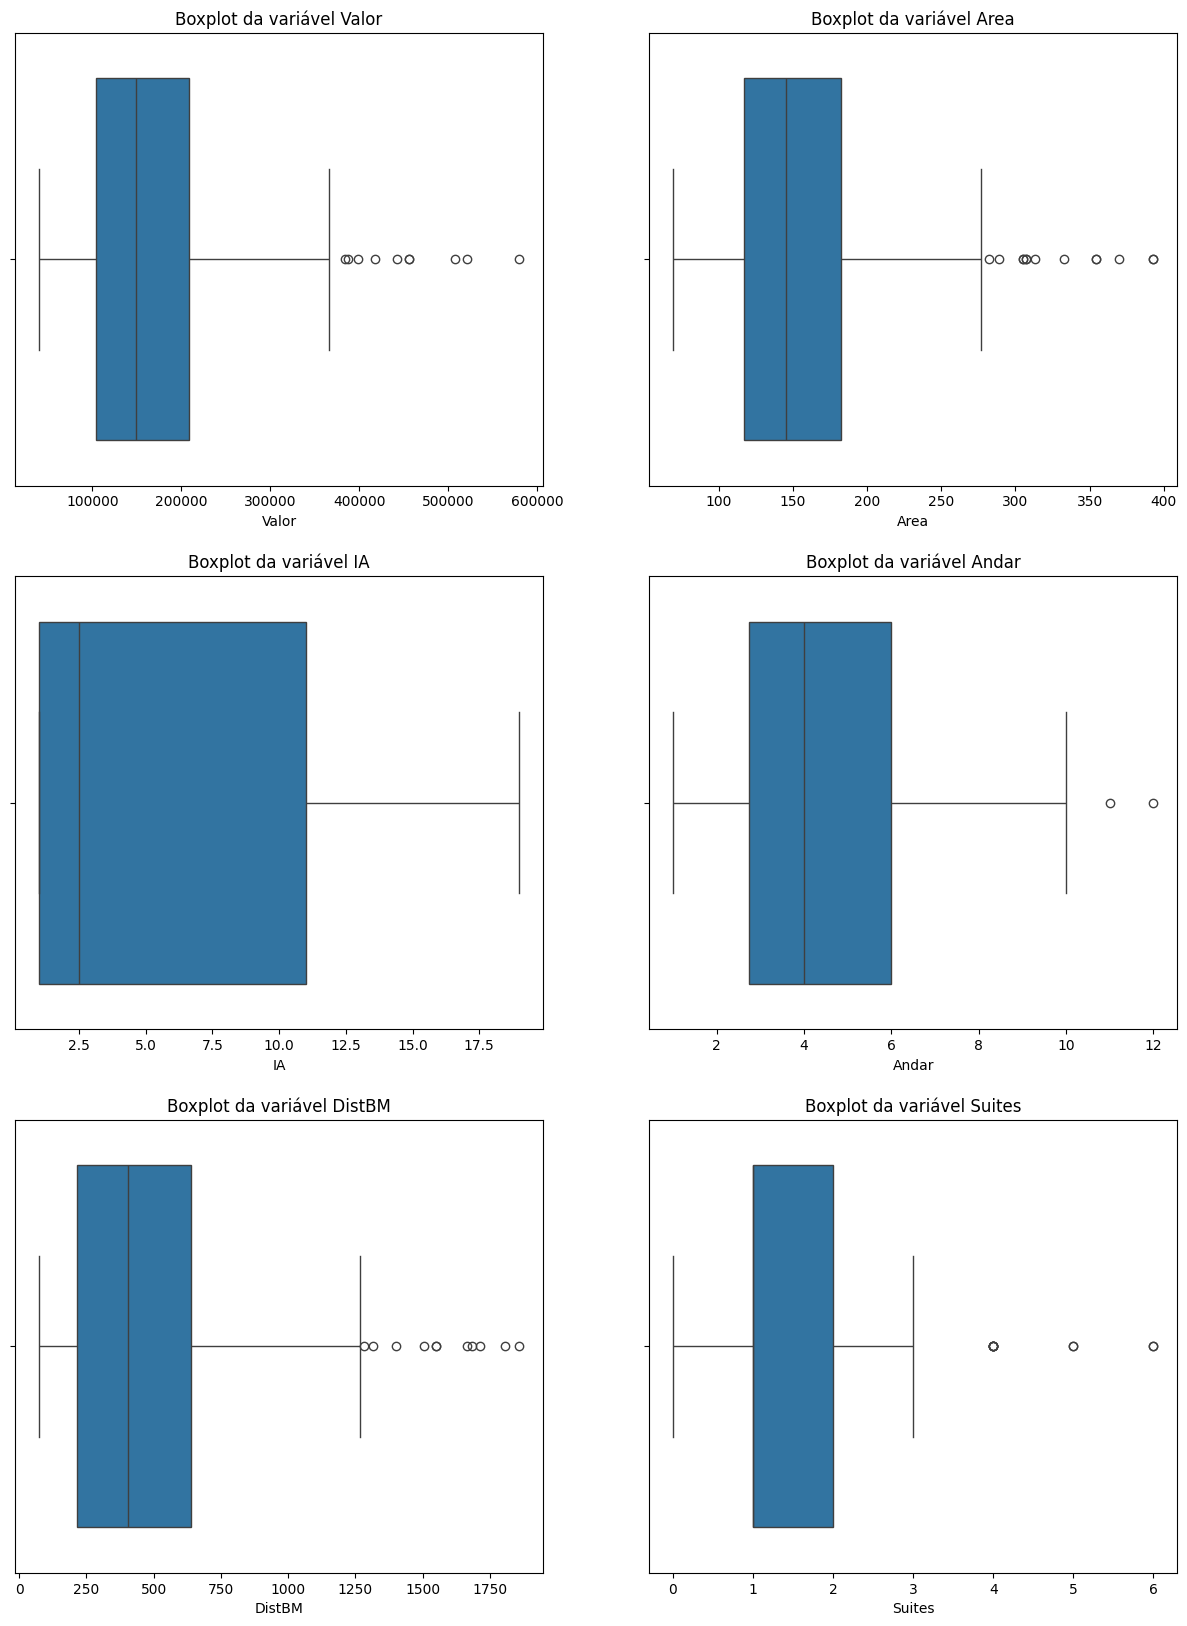

In [34]:
figure, ax = plt.subplots(3, 2, figsize=(15, 20))

var_list = ['Valor', 'Area', 'IA', 'Andar', 'DistBM', 'Suites']

for i in range(6):
    graph = sns.boxplot(x=var_list[i], data=df, ax=ax[i//2][i%2])
    graph.set_xlabel(var_list[i])
    graph.set_title(f'Boxplot da variável {var_list[i]}')




Vamos analisar a correlação entre as variáveis.

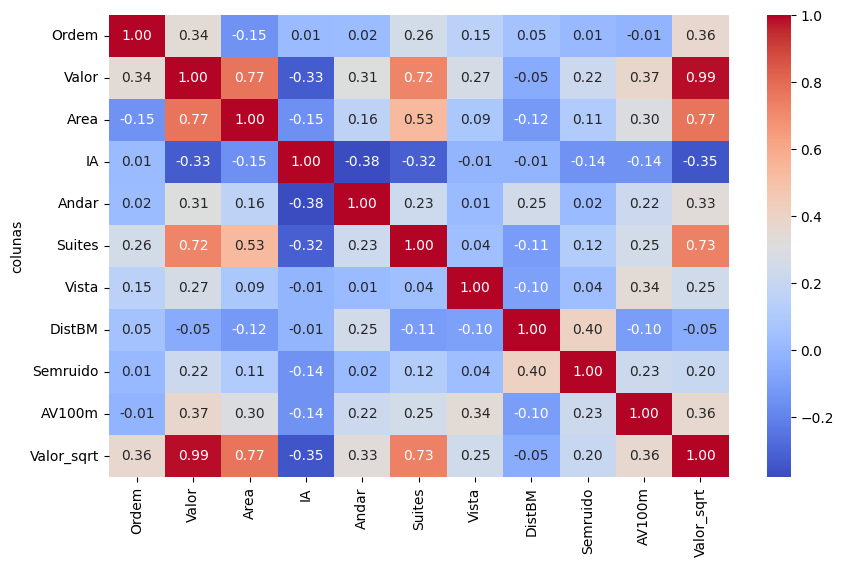

In [54]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    data = (
        df.corr()
        .insert_at_idx(0, pl.Series('colunas', df.columns))
        .to_pandas()
        .set_index('colunas')
        ),
    annot = True,
    cmap = 'coolwarm',
    fmt = '.2f'
);

Vamos analisar as variáveis através de um gráfico de dispersão.

Text(0.5, 1.0, 'Dispersão entre as variáveis Área e Valor')

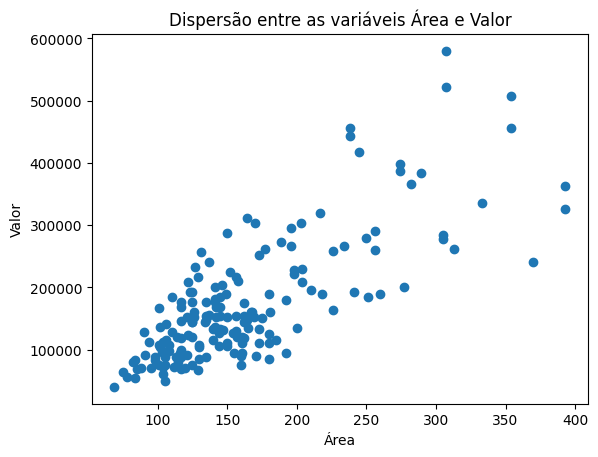

In [55]:
plt.scatter(df['Area'], df['Valor'])
plt.xlabel('Área')
plt.ylabel('Valor')
plt.title('Dispersão entre as variáveis Área e Valor')

Text(0.5, 1.0, 'Dispersão entre as variáveis IA e Valor')

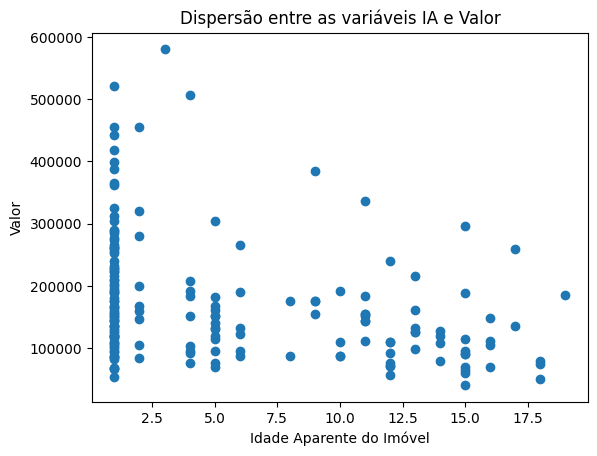

In [56]:
plt.scatter(df['IA'], df['Valor'])
plt.xlabel('Idade Aparente do Imóvel')
plt.ylabel('Valor')
plt.title('Dispersão entre as variáveis IA e Valor')

Vamos analisar as variáveis qualitativas (booleanas).

<Axes: xlabel='Vista', ylabel='Valor'>

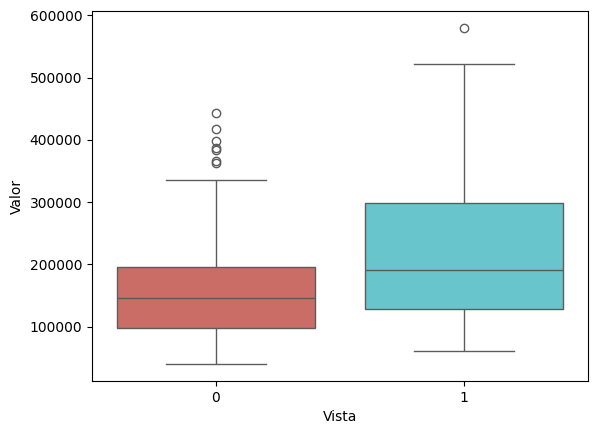

In [64]:
sns.boxplot(x='Vista', y='Valor', hue='Vista', palette='hls', legend=False, data=df)

<Axes: xlabel='Semruido', ylabel='Valor'>

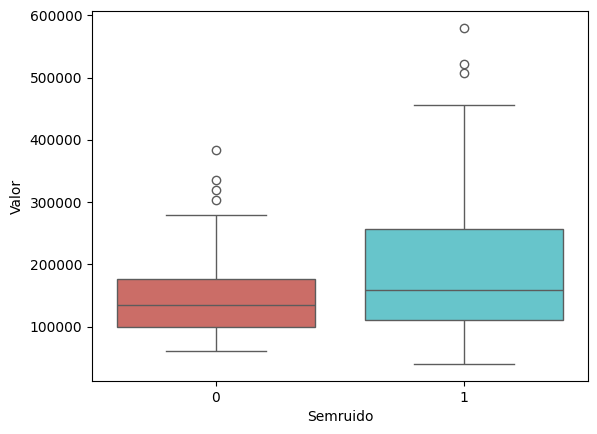

In [65]:
sns.boxplot(x='Semruido', y='Valor', hue='Semruido', palette='hls', legend=False, data=df)

<Axes: xlabel='AV100m', ylabel='Valor'>

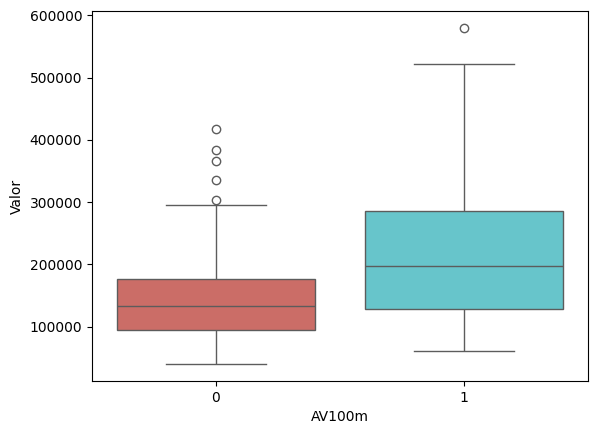

In [66]:
sns.boxplot(x='AV100m', y='Valor', hue='AV100m', palette='hls', legend=False, data=df)

## Parte 4 - Modelo de Regressão

Vamos separar as variáveis entre preditoras (X) e variável target (y).

In [101]:
X = df.select(pl.all().exclude('Valor', 'Valor_sqrt', 'Ordem'))
y = df.select('Valor')

Separar os dados entre treino e teste.

In [102]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=101)

Criando e treinando o modelo

In [103]:
lr = LinearRegression()
lr.fit(train_X, train_y)

LinearRegression()

In [104]:
y_pred = lr.predict(test_X)

Podemos verificar qual o intercepto ($\beta_0$) e os coeficientes ($\beta_x$) da nossa regressão. O intercepto é o valor médio de y quando todos os preditores são iguais a zero. O coeficiente é a variação média de y quando o preditor aumenta em uma unidade.

In [105]:
print(f'Intercepto: {lr.intercept_[0]}')

pl.DataFrame({'var': X.columns, 'coef': lr.coef_[0]})

Intercepto: -40165.8752773022


var,coef
str,f64
"""Area""",815.218075
"""IA""",-1052.4171
"""Andar""",5635.237485
"""Suites""",34315.785459
"""Vista""",63486.030935
"""DistBM""",-2.52253
"""Semruido""",17027.508944
"""AV100m""",-5672.535051


Vamos visualizar as previsões do nosso modelo através de um gráfico. 

A linha azul é nossa reta de regressão.

A linha vermelha representa uma previsão perfeita: para qualquer valor de `test_y` no eixo x, o valor correspondente de `test_y` no eixo y é o mesmo. Portanto, se um ponto de dados está na linha vermelha, o valor previsto para esse ponto é exatamente igual ao seu valor real.

Em outras palavras, quanto mais próximos os pontos estiverem da linha vermelha, melhor o modelo de regressão está prevendo os valores. Se todos os pontos estiverem na linha vermelha, o modelo de regressão é perfeito (embora isso raramente aconteça na prática).

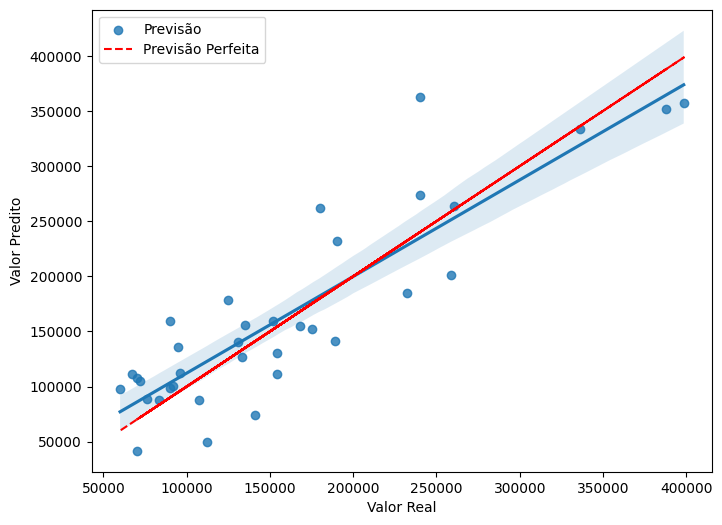

In [119]:
fig = plt.figure(figsize=(8, 6))
ax = sns.regplot(x=test_y, y=y_pred, label='Previsão')
ax.set(xlabel='Valor Real', ylabel='Valor Predito')
ax = plt.plot(test_y, test_y,'--r', label='Previsão Perfeita')
plt.legend()

Vamos agora avaliar o modelo através de alguma métricas.

In [121]:
MAE = mean_absolute_error(test_y, y_pred)
MSE = mean_squared_error(test_y, y_pred)
R2 = r2_score(test_y, y_pred)

print(f'MAE: {MAE:.2f}')
print(f'MSE: {MSE:.2f}')
print(f'R2: {R2:.2f}')

MAE: 34422.99
MSE: 1844288772.18
R2: 0.76


Observamos que nosso modelo de regressão linear teve um desempenho razoável. Vamos agora comparar com outro modelo de regressão.

### Árvore de Decisão

Usaremos o modelo de Árvore de Decisão para comparar com o modelo de Regressão Linear. O modelo de Árvore de Decisão é um modelo não paramétrico, ou seja, não faz suposições sobre a distribuição dos dados. Esse modelo é mais flexível e pode se ajustar melhor aos dados.

In [150]:
dt = DecisionTreeRegressor(max_depth=5, random_state=101)
dt.fit(train_X, train_y)

y_pred = dt.predict(test_X)

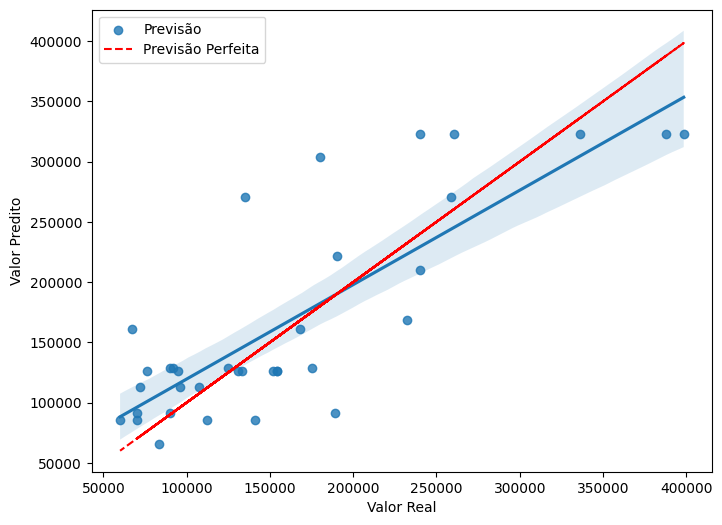

In [151]:
fig = plt.figure(figsize=(8, 6))
ax = sns.regplot(x=test_y, y=y_pred, label='Previsão')
ax.set(xlabel='Valor Real', ylabel='Valor Predito')
ax = plt.plot(test_y, test_y,'--r', label='Previsão Perfeita')
plt.legend()

In [152]:
MAE = mean_absolute_error(test_y, y_pred)
MSE = mean_squared_error(test_y, y_pred)
R2 = r2_score(test_y, y_pred)

print(f'MAE: {MAE:.2f}')
print(f'MSE: {MSE:.2f}')
print(f'R2: {R2:.2f}')

MAE: 40636.26
MSE: 2781338709.82
R2: 0.64


### SVR

Vamos agora treinar uma SVR (Support Vector Regressor) para comparar com os outros modelos. A SVR é uma regressão vetorial de suporte, que é uma versão mais complexa do SVM (Support Vector Machine). A SVR usa o kernel para transformar os dados e encontrar uma linha de melhor ajuste.

In [157]:
svr = SVR(kernel='linear')
svr.fit(train_X, train_y.to_numpy().ravel())

y_pred = svr.predict(test_X)

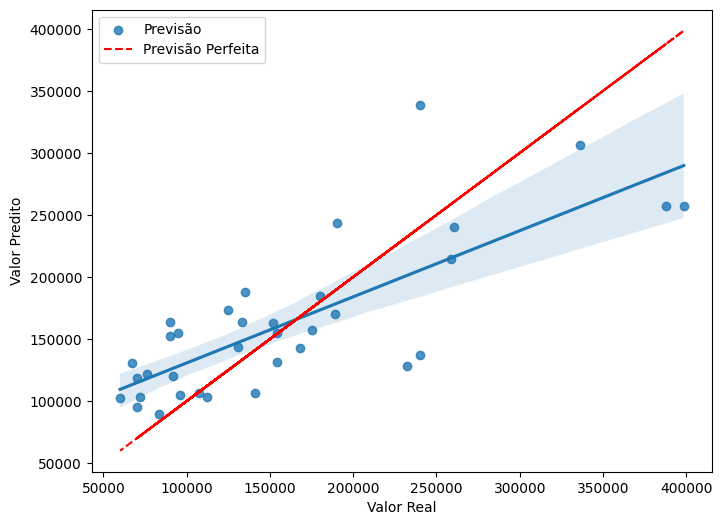

In [161]:
fig = plt.figure(figsize=(8, 6))
ax = sns.regplot(x=test_y, y=y_pred, label='Previsão')
ax.set(xlabel='Valor Real', ylabel='Valor Predito')
ax = plt.plot(test_y, test_y,'--r', label='Previsão Perfeita')
plt.legend()

In [162]:
MAE = mean_absolute_error(test_y, y_pred)
MSE = mean_squared_error(test_y, y_pred)
R2 = r2_score(test_y, y_pred)

print(f'MAE: {MAE:.2f}')
print(f'MSE: {MSE:.2f}')
print(f'R2: {R2:.2f}')

MAE: 43153.54
MSE: 3123421996.78
R2: 0.59
